In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats as stats
import os
import matplotlib.ticker as ticker

In [3]:
df = pd.read_table('FigS7B.csv', sep = "\t")
df.head()

,Chromosome,Window,Freq_Mean_PoolA,Freq_Median_PoolA,STD_PoolA,Freq_Mean_PoolB,Freq_Median_PoolB,STD_PoolB,Freq_Mean_PoolC,Freq_Median_PoolC,STD_PoolC,Freq_Mean_PoolD,Freq_Median_PoolD,STD_PoolD,Freq_Mean_PoolE,Freq_Median_PoolE,STD_PoolE
0,chr1,5000,0.465102,0.456439,0.113370,0.502123,0.5,0.118273,0.430461,0.428571,0.109263,0.437321,0.432432,0.101307,0.523810,0.525000,0.106582
1,chr1,10000,0.466056,0.458333,0.113848,0.502475,0.5,0.117841,0.429222,0.428571,0.107829,0.438566,0.432432,0.100460,0.524093,0.525000,0.105672
2,chr1,15000,0.465433,0.458333,0.112990,0.501778,0.5,0.120657,0.429251,0.428571,0.108821,0.438242,0.432432,0.100957,0.523064,0.525000,0.107004
3,chr1,20000,0.466955,0.458333,0.111133,0.500350,0.5,0.119348,0.428429,0.428571,0.108079,0.438139,0.432432,0.100984,0.525786,0.526316,0.105757
4,chr1,25000,0.466890,0.458333,0.112699,0.498520,0.5,0.120268,0.426520,0.424242,0.107277,0.435602,0.428571,0.100763,0.523654,0.523810,0.105818


In [4]:
genome=[30427671,19698289,23459830,18585056,26975502]
space=2000000
chr1=30427671 / 2 
chr2=30427671 + 19698289 / 2 + space
chr3=30427671 + 19698289 + 23459830 / 2 + space * 2
chr4=30427671 + 19698289 + 23459830 + 18585056 / 2 + space * 3
chr5=30427671 + 19698289 + 23459830 + 18585056 + 26975502 / 2 + space * 4

In [5]:
space=2000000
def addPosition(dataframe):
    for idx, row in dataframe.iterrows():
        if row['Chromosome'] == 'chr1':
            dataframe.loc[idx,'position'] = row['Window']
        elif row['Chromosome'] == 'chr2':
            dataframe.loc[idx,'position'] = row['Window'] + 30427671 + space
        elif row['Chromosome'] == 'chr3':
            dataframe.loc[idx,'position'] = row['Window'] + 30427671 + 19698289 + space * 2
        elif row['Chromosome'] == 'chr4':
            dataframe.loc[idx,'position'] = row['Window'] + 30427671 + 19698289 + 23459830 + space * 3
        elif row['Chromosome'] == 'chr5':
            dataframe.loc[idx,'position'] = row['Window'] + 30427671 + 19698289 + 23459830 + 18585056 + space * 4
addPosition(df)

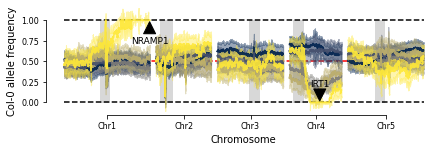

In [17]:
cm = 1/2.54
fig = plt.figure(figsize=(18*cm,5*cm))
colors = plt.cm.cividis(np.linspace(0,1,5))
def plot(pool,idx):
    for i in range(1,6):
        data=df.loc[df['Chromosome'] == 'chr'+str(i)]
        plt.plot(data['position'],
                 data['Freq_Median_' + pool],
                 alpha=0.9,
                 zorder=7,
                 color=colors[idx])
        plt.fill_between(data['position'],
                     data['Freq_Median_' + pool]-data['STD_' + pool],
                     data['Freq_Median_' + pool]+data['STD_' + pool],
                     alpha=0.4,
                     zorder=7,
                     color=colors[idx])

plot('PoolE',0)        
plot('PoolD',1)       
plot('PoolC',2)
plot('PoolB',3)        
plot('PoolA',4)





plt.axvspan(12700000, 
            16100000,
            ymin=0.11,ymax=0.89, 
            facecolor='0.5', alpha=0.3)
espace=30427671+space
plt.annotate(r'NRAMP1',
             xy=(30227671, 0.99),
             xytext=(30217671,0.72),
             arrowprops=dict(facecolor='black',shrink=0.05),
             zorder=7,
             fontsize=9,
             horizontalalignment='center')
plt.axvspan(1400000+espace, 
            6100000+espace,
            ymin=0.11,ymax=0.89, 
            facecolor='0.5', alpha=0.3)
espace=30427671 + 19698289 + space * 2
plt.axvspan(11100000 + espace, 
            15200000 + espace,
            ymin=0.11,ymax=0.89, 
            facecolor='0.5', alpha=0.3)
espace=30427671 + 19698289 + 23459830 + space * 3
plt.axvspan(1100000 + espace, 
            5000000 + espace,
            ymin=0.11,ymax=0.89, 
            facecolor='0.5', 
            alpha=0.3)
plt.annotate(r'IRT1',
             xy=(10707344 + espace, 0.01),
             xytext=(10707344 + espace,0.2),
             arrowprops=dict(facecolor='black',shrink=0.05),
             zorder=7,
             fontsize=9,
             horizontalalignment='center')
espace=30427671 + 19698289 + 23459830 + 18585056 + space * 4
plt.axvspan(9700000 + espace, 
            13200000 + espace,
            ymin=0.11,ymax=0.89, 
            facecolor='0.5', alpha=0.3)
plt.hlines(y=0.5,
             xmin=min(df['position']),
             xmax=max(df['position']),
             color='r',
             linestyle='--',
             zorder=6)
plt.hlines(y=0,
             xmin=min(df['position']),
             xmax=max(df['position']),
             color='0',
             linestyle='--',
#              alpha=0.4,
             zorder=6)
plt.hlines(y=1,
             xmin=min(df['position']),
             xmax=max(df['position']),
             color='0',
             linestyle='--',
#              alpha=0.4,
             zorder=6)
plt.tick_params(labelsize=8)
plt.xlabel('Chromosome',fontsize=10)
plt.ylabel('Col-0 allele frequency',fontsize=10)
plt.ylim(-0.15,1.15)
plt.xticks([chr1,chr2,chr3,chr4,chr5],["Chr1", "Chr2", "Chr3", "Chr4", "Chr5"])
sns.despine(trim=True)
plt.savefig("Fig7B.png", format="png",bbox_inches="tight",facecolor='w',dpi=800)